In [ ]:
!pip install opencv-python

In [ ]:
import cv2

users = {}  # Dictionary to store user information

def register():
    username = input("Enter a username: ")
    password = input("Enter a password: ")

    if username in users:
        print("Username already exists!")
    else:
        users[username] = password
        print("Registration successful!")



In [ ]:
def login():
    username = input("Enter your username: ")
    password = input("Enter your password: ")

    if username in users and users[username] == password:
        print("Login successful!")
        process_leaf_image()
    else:
        print("Invalid username or password.")


In [ ]:
def process_leaf_image():
    image_path = input("Enter the path to the leaf image: ")
    try:
        image = cv2.imread(image_path)
        # Perform image processing tasks on the leaf image
        # ...

        # Identify the tree species based on the processed image
        tree_species = identify_tree_species(image)

        print("Leaf image processed successfully.")
        print("Identified tree species:", tree_species)
    except Exception as e:
        print("Error processing leaf image:", str(e))

**Feature extraction**

In [ ]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

In [ ]:
import zipfile

# Provide the name of the uploaded zip file
zip_file_name = "Leaves.zip"

# Provide the directory where you want to extract the contents of the zip file
extracted_dir = "/content/Leaves"

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [ ]:
os.listdir()

<function posix.listdir(path=None)>

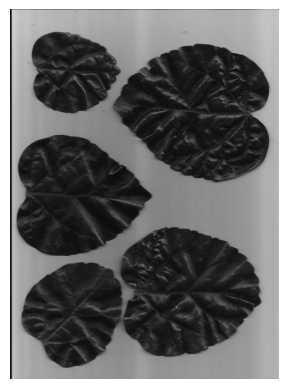

In [ ]:
# Define the path to the extracted "Leaves" folder
extracted_dir = "/content/Leaves/Leaves"

# Get the filenames of the leaves under the "Leaves" directory
image_path_list = [f for f in os.listdir(extracted_dir) if not f.startswith('__MACOSX')]

# Looking at the first image
i = 0
image_path = os.path.join(extracted_dir, image_path_list[i])

# Check if the image_path points to a file and not a folder
if os.path.isfile(image_path):
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was read successfully
    if image is not None:
        # Display the image using matplotlib
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()
    else:
        print("Error: Unable to read the image at", image_path)
else:
    print("Error: The path", image_path, "points to a folder, not an image file.")


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,convex_ratio,label
0,261048,4093,0.929666,0.007893,14918.809590,15927.008339,15927.008339,78325.804539,1146.135181,422.241606,0.015679,e
1,4,4,1.000000,1.000000,1.250000,-0.000000,-0.000000,0.000000,4.472136,0.000000,1.000000,e
2,31502,30387,0.403386,0.749741,2614.754960,-171.670248,-171.670248,2341.289696,207.749502,190.096972,0.964605,e
3,91717,88265,0.500039,0.725088,8013.818716,-746.760893,-746.760893,6562.290856,365.062031,316.144692,0.962362,e
4,68602,66436,0.350338,0.721135,5786.057624,-167.233053,-167.233053,5153.820954,305.354015,286.001718,0.968427,e
5,136835,122244,0.879618,0.646301,21641.203404,3223.083603,3223.083603,5664.058878,596.883851,283.925808,0.893368,e


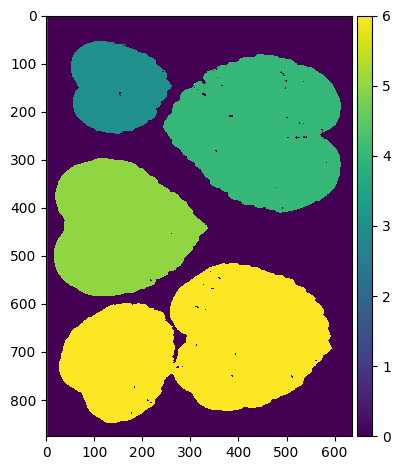

In [ ]:
binary = image < threshold_otsu(image)
binary = closing(binary)
imshow(binary)
label_img = label(binary)
imshow(label_img)
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',
                                        'inertia_tensor',
                                        'major_axis_length',
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[5]
table

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.measure import label, regionprops_table
from skimage.morphology import closing
from skimage.filters import threshold_otsu

# Define the path to the extracted "Leaves" folder
extracted_dir = "/content/Leaves/Leaves"

# Get the filenames of the leaves under the "Leaves" directory
image_path_list = os.listdir(extracted_dir)

df = pd.DataFrame()

for i in range(len(image_path_list)):
    image_path = os.path.join(extracted_dir, image_path_list[i])

    # Read the image using cv2.imread()
    image = cv2.imread(image_path)

    # Check if the image was read successfully
    if image is not None:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        binary = image_gray < threshold_otsu(image_gray)
        binary = closing(binary)
        label_img = label(binary)

        table = pd.DataFrame(regionprops_table(label_img, image_gray,
                                               ['convex_area', 'area', 'eccentricity',
                                                'extent', 'inertia_tensor',
                                                'major_axis_length', 'minor_axis_length',
                                                'perimeter', 'solidity', 'image',
                                                'orientation', 'moments_central',
                                                'moments_hu', 'euler_number',
                                                'equivalent_diameter',
                                                'mean_intensity', 'bbox']))

        table['perimeter_area_ratio'] = table['perimeter'] / table['area']
        real_images = []
        std = []
        mean = []
        percent25 = []
        percent75 = []

        for prop in regionprops(label_img):
            min_row, min_col, max_row, max_col = prop.bbox
            img = image_gray[min_row:max_row, min_col:max_col]
            real_images.append(img)
            mean.append(np.mean(img))
            std.append(np.std(img))
            percent25.append(np.percentile(img, 25))
            percent75.append(np.percentile(img, 75))

        table['real_images'] = real_images
        table['mean_intensity'] = mean
        table['std_intensity'] = std
        table['25th Percentile'] = percent25
        table['75th Percentile'] = percent75
        table['iqr'] = table['75th Percentile'] - table['25th Percentile']
        table['label'] = image_path[5:]

        df = pd.concat([df, table], axis=0)
    else:
        print("Error: Unable to read the image at", image_path)

df.head()


,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,261048,4093,0.929666,0.007893,14918.809590,15927.008339,15927.008339,78325.804539,1146.135181,422.241606,...,0,876,592,0.572593,"[[14, 25, 11, 1, 20, 31, 31, 39, 39, 38, 38, 3...",61.574948,27.0,147.00,120.00,ent/Leaves/Leaves/plantB_6.jpg
1,4,4,1.000000,1.000000,1.250000,-0.000000,-0.000000,0.000000,4.472136,0.000000,...,633,1,637,0.500000,"[[94, 87, 81, 77]]",6.417749,80.0,88.75,8.75,ent/Leaves/Leaves/plantB_6.jpg
2,31502,30387,0.403386,0.749741,2614.754960,-171.670248,-171.670248,2341.289696,207.749502,190.096972,...,52,247,262,0.025091,"[[183, 182, 181, 181, 180, 180, 180, 181, 181,...",50.230891,27.0,89.00,62.00,ent/Leaves/Leaves/plantB_6.jpg
3,91717,88265,0.500039,0.725088,8013.818716,-746.760893,-746.760893,6562.290856,365.062031,316.144692,...,244,411,614,0.018578,"[[159, 159, 159, 159, 158, 159, 159, 159, 159,...",52.958911,23.0,103.00,80.00,ent/Leaves/Leaves/plantB_6.jpg
4,68602,66436,0.350338,0.721135,5786.057624,-167.233053,-167.233053,5153.820954,305.354015,286.001718,...,16,585,337,0.015947,"[[176, 176, 175, 174, 172, 171, 170, 170, 169,...",48.024316,22.0,87.00,65.00,ent/Leaves/Leaves/plantB_6.jpg


In [ ]:
df

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,261048,4093,0.929666,0.007893,14918.809590,15927.008339,15927.008339,78325.804539,1146.135181,422.241606,...,0,876,592,0.572593,"[[14, 25, 11, 1, 20, 31, 31, 39, 39, 38, 38, 3...",61.574948,27.0,147.00,120.00,ent/Leaves/Leaves/plantB_6.jpg
1,4,4,1.000000,1.000000,1.250000,-0.000000,-0.000000,0.000000,4.472136,0.000000,...,633,1,637,0.500000,"[[94, 87, 81, 77]]",6.417749,80.0,88.75,8.75,ent/Leaves/Leaves/plantB_6.jpg
2,31502,30387,0.403386,0.749741,2614.754960,-171.670248,-171.670248,2341.289696,207.749502,190.096972,...,52,247,262,0.025091,"[[183, 182, 181, 181, 180, 180, 180, 181, 181,...",50.230891,27.0,89.00,62.00,ent/Leaves/Leaves/plantB_6.jpg
3,91717,88265,0.500039,0.725088,8013.818716,-746.760893,-746.760893,6562.290856,365.062031,316.144692,...,244,411,614,0.018578,"[[159, 159, 159, 159, 158, 159, 159, 159, 159,...",52.958911,23.0,103.00,80.00,ent/Leaves/Leaves/plantB_6.jpg
4,68602,66436,0.350338,0.721135,5786.057624,-167.233053,-167.233053,5153.820954,305.354015,286.001718,...,16,585,337,0.015947,"[[176, 176, 175, 174, 172, 171, 170, 170, 169,...",48.024316,22.0,87.00,65.00,ent/Leaves/Leaves/plantB_6.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,3921,3807,0.887114,0.665559,159.035246,95.289116,95.289116,643.693959,102.898452,47.492903,...,38,864,90,0.069592,"[[205, 205, 204, 204, 204, 204, 203, 203, 203,...",67.063237,51.0,195.00,144.00,ent/Leaves/Leaves/plantC.jpg
52,7737,7262,0.861139,0.598928,850.457575,416.461734,416.461734,617.340903,136.608317,69.447414,...,243,854,368,0.053778,"[[42, 41, 43, 46, 48, 44, 43, 43, 42, 42, 41, ...",66.973793,47.0,186.00,139.00,ent/Leaves/Leaves/plantC.jpg
53,6293,5997,0.856831,0.634402,938.659185,-61.237392,-61.237392,256.436895,122.905646,63.369862,...,103,857,240,0.056963,"[[199, 198, 198, 198, 198, 198, 198, 198, 198,...",69.968357,45.0,191.00,146.00,ent/Leaves/Leaves/plantC.jpg
54,5949,5563,0.900075,0.590239,1036.536111,19.059408,19.059408,197.316619,128.807996,56.126142,...,354,863,499,0.062851,"[[48, 52, 63, 102, 158, 169, 182, 185, 188, 19...",69.085427,47.0,193.00,146.00,ent/Leaves/Leaves/plantC.jpg


In [ ]:
X = df.drop(columns=['label', 'image', 'real_images'])
#features
X = X[['iqr','75th Percentile','inertia_tensor-1-1',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=123, stratify=y)

MACHINE LEARNING

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=123)
clf.fit(X_train, y_train)
#print confusion matrix of test set
print(classification_report(clf.predict(X_test), y_test))
#print accuracy score of the test set
print(f"Test Accuracy: {np.mean(clf.predict(X_test) ==y_test)*100:.2f}%")

                                 precision    recall  f1-score   support

    ent/Leaves/Leaves/blobs.png       1.00      0.95      0.98        64
 ent/Leaves/Leaves/plantA_1.jpg       0.00      0.00      0.00         0
ent/Leaves/Leaves/plantA_10.jpg       0.67      0.67      0.67         3
ent/Leaves/Leaves/plantA_11.jpg       0.00      0.00      0.00         0
ent/Leaves/Leaves/plantA_12.jpg       0.00      0.00      0.00         0
ent/Leaves/Leaves/plantA_13.jpg       0.00      0.00      0.00         1
 ent/Leaves/Leaves/plantA_2.jpg       0.00      0.00      0.00         2
 ent/Leaves/Leaves/plantA_3.jpg       0.00      0.00      0.00         1
 ent/Leaves/Leaves/plantA_4.jpg       0.00      0.00      0.00         0
 ent/Leaves/Leaves/plantA_5.jpg       0.00      0.00      0.00         1
 ent/Leaves/Leaves/plantA_6.jpg       0.00      0.00      0.00         0
 ent/Leaves/Leaves/plantA_7.jpg       0.00      0.00      0.00         2
 ent/Leaves/Leaves/plantA_8.jpg       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=123)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Predict the test set
rf_y_pred = rf_clf.predict(X_test)

# Print the confusion matrix and classification report
print("Random Forest Classifier:")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

# Calculate and print the accuracy score
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Test Accuracy: {rf_accuracy*100:.2f}%")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the SVM classifier
svm_clf = SVC(kernel='linear', random_state=123)

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Predict the test set
svm_y_pred = svm_clf.predict(X_test)

# Print the confusion matrix and classification report
print("Support Vector Machine Classifier:")
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

# Calculate and print the accuracy score
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Test Accuracy: {svm_accuracy*100:.2f}%")


In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

def preprocess_image(image_path):
    # Load the image using OpenCV or any other library
    image = cv2.imread(image_path)
    # Preprocess the image (resize, normalize, etc.)
    # ... Add your preprocessing steps here ...
    return processed_image

def identify_tree_species(image_path):
    # Load the pre-trained model with the specified hyperparameters
    clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=123)

    # Load the trained model weights (if applicable)
    # clf.load_model_weights("path/to/model_weights")

    # Preprocess the input image
    processed_image = preprocess_image(image_path)

    # Perform prediction on the processed image
    predicted_tree_name = clf.predict(processed_image.reshape(1, -1))

    # Return the predicted tree name
    return predicted_tree_name

# Example usage:
image_path = "path/to/your/image.jpg"
predicted_tree = identify_treeimage(image_path)
print(f"Predicted Tree: {predicted_tree}")


In [ ]:
def identify_tree_species(image):
   image_path = "path/to/your/image.jpg"
  predicted_tree = identify_treeimage(image_path)
  print(f"Predicted Tree: {predicted_tree}")


    return predicted_tree


In [ ]:
#def main():
 #   while True:
  #      print("\n----- Menu -----")
   #     print("1. Register")
    #    print("2. Login")
     #   print("3. Exit")

      #  choice = input("Enter your choice (1-3): ")

       # if choice == '1':
         #   register()
        #elif choice == '2':
          #  login()
       # elif choice == '3':
           # print("Goodbye!")
            #break
        #else:
        #    print("Invalid choice. Try again.")

#if __name__ == '__main__':
 #   main()



----- Menu -----
1. Register
2. Login
3. Exit


KeyboardInterrupt: ignored